In [15]:
import numpy as np
import math
from matplotlib import pyplot as plt
import cv2
import scipy


In [16]:
def sense(x, y, theta, phi, sensor_dist, trailmap, mapsize, foodmap):
    N_particles = len(x)
    if foodmap.any() == None:
        foodmap = np.zeros_like(trailmap)
    dthetas = [-phi, 0, phi]
    

    ddirections = np.zeros(N_particles)
    rx = np.round(x + sensor_dist * np.cos(theta-phi))
    ry = np.round(y + sensor_dist * np.sin(theta-phi))
    mx = np.round(x + sensor_dist * np.cos(theta))
    my = np.round(y + sensor_dist * np.sin(theta))
    lx = np.round(x + sensor_dist * np.cos(theta+phi))
    ly = np.round(y + sensor_dist * np.sin(theta+phi))
    

    for i in range(N_particles):
        
        
        inds_to_sense = [int(rx[i]), int(ry[i]), int(mx[i]), int(my[i]), int(lx[i]), int(ly[i])]
        #print(inds_to_sense)
        rml = np.zeros(3)
        
        for ind in range(3):
            trail_val = 0
            if inds_to_sense[ind*2] >= mapsize or inds_to_sense[ind*2] < 0 or  inds_to_sense[ind*2+1] >= mapsize or inds_to_sense[ind*2+1] < 0:
                rml[ind] = 0
            else:
                trail_val = trailmap[inds_to_sense[ind*2], inds_to_sense[ind*2+1]] + foodmap[inds_to_sense[ind*2], inds_to_sense[ind*2+1]]
                if trail_val < 0.01:
                    trail_val = 0.
                rml[ind] = trail_val
        #print(f'particle: {i}' , rml)
        #print(np.argmax(rml))
        
        if rml[0] == rml[1] == rml[2]:
            ddirections[i] = dthetas[1]
        else:
            ddirections[i] = dthetas[np.argmax(rml)]
            #plt.imshow(trailmap)
        


    #print(ddirections)
    return ddirections

        




In [17]:
def deposit(x, y, trailmap):
    for i in range(len(x)):
        trailmap[int(np.round(x[i])), int(np.round(y[i]))] = 1
    return trailmap


In [18]:
def diffuse(trailmap):
    n, m = trailmap.shape
    new_trailmap = trailmap
    for i in range(n):
        for j in range(m):
            if i == 0 and j == 0:
                new_trailmap[i, j] = np.mean(trailmap[i:i+2, j:j+2])
            elif i == n and j == m:
                new_trailmap[i, j] = np.mean(trailmap[i-1:i+1, j-1:j+1])
            elif i == 0:
                new_trailmap[i, j] = np.mean(trailmap[i:i+2, j-1:j+2])
            elif j == 0:
                new_trailmap[i, j] = np.mean(trailmap[i-1:i+2, j:j+2])
            elif i == n:
                new_trailmap[i, j] = np.mean(trailmap[i-1:i+1, j-1:j+2])
            elif j == m:
                new_trailmap[i, j] = np.mean(trailmap[i-1:i+2, j-1:j+1])
            else:
                new_trailmap[i, j] = np.mean(trailmap[i-1:i+2, j-1:j+2])
            
            
            
    return new_trailmap
            


In [19]:
def better_diffuse(trailmap):
    return scipy.ndimage.uniform_filter(trailmap)

In [20]:
def decay(trailmap):
    trailmap = trailmap*0.9

    return trailmap

In [21]:
a = [0,1,2,3,4,5,6,7,8,9]

print(a[5-1:5+1])

[4, 5]


In [22]:

L = 200  # Dimension of the squared arena.
population_percent = 1
N_part = int(L*L * population_percent/100)   # Number of particles.

v = 1  # Speed.
#Rf = 3  # Flocking radius.
eta = 0  # Noise.  Try values: 0.01, 0.3, 1.0, 2 * np.pi
dt = 1  # Time step.
phi = np.pi/4
sensor_dist = 9

np.random.seed(2)

# Initialization.

# Random position.
x = (np.random.rand(N_part)) * L  # in [-L/2, L/2]
y = (np.random.rand(N_part)) * L  # in [-L/2, L/2]

# Random orientation.
theta = 2 * (np.random.rand(N_part) - 0.5) * np.pi  # in [-pi, pi]


trailmap = np.zeros([L,L])

print(N_part)

400


16.64380429812569


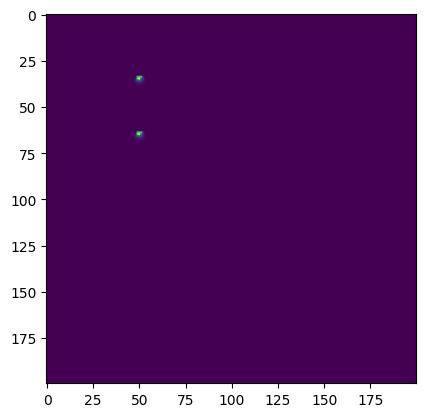

In [23]:
# Create food map
foodmap = np.zeros([L,L])
foodmap[35, 50] = 100
foodmap[65, 50] = 100
'''foodmap[:,0] = -50
foodmap[:,L-1] = -50
foodmap[0, :] = -50
foodmap[L-1, :] = -50'''
for i in range(1):
    foodmap = diffuse(foodmap)
plt.imshow(foodmap)
print(np.max(foodmap))

In [24]:
foodmap = np.zeros([L,L])
foodmap[35, 50] = 100
foodmap[65, 50] = 100

%time foodmap = diffuse(foodmap)

CPU times: total: 266 ms
Wall time: 273 ms


In [25]:
foodmap = np.zeros([L,L])
foodmap[35, 50] = 100
foodmap[65, 50] = 100

%time foodmap = better_diffuse(foodmap)

CPU times: total: 0 ns
Wall time: 496 μs


11.111111111111112


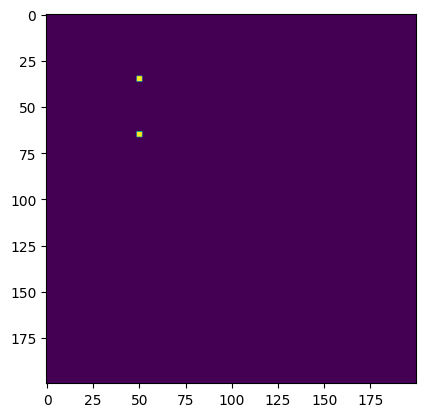

In [26]:
# Create food map
foodmap = np.zeros([L,L])
foodmap[35, 50] = 100
foodmap[65, 50] = 100
'''foodmap[:,0] = -50
foodmap[:,L-1] = -50
foodmap[0, :] = -50
foodmap[L-1, :] = -50'''
for i in range(1):
    foodmap = better_diffuse(foodmap)
plt.imshow(foodmap)
print(np.max(foodmap))

In [27]:
foodmap = np.zeros([L,L])

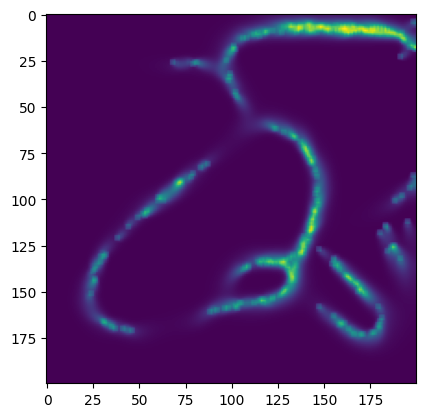

In [28]:
import time
from scipy.constants import Boltzmann as kB 
from tkinter import *

visuals_on = True

window_size = 600

rp = 0.5  # Plotting radius of a particle.
vp = 1  # Length of the arrow indicating the velocity direction.
line_width = 1  # Width of the arrow line.

N_skip = 1

if visuals_on:
    tk = Tk()
    tk.geometry(f'{window_size + 20}x{window_size + 20}')
    tk.configure(background='#000000')

    canvas = Canvas(tk, background='#ECECEC')  # Generate animation window 
    tk.attributes('-topmost', 0)
    canvas.place(x=10, y=10, height=window_size, width=window_size)

    particles = []
    for j in range(N_part):
        particles.append(
            canvas.create_oval(
                (x[j] - rp) / L * window_size, 
                (y[j] - rp) / L * window_size,
                (x[j] + rp) / L * window_size, 
                (y[j] + rp) / L * window_size,
                outline='#FF0000', 
                fill='#FF0000',
            )
        )

    velocities = []
    for j in range(N_part):
        velocities.append(
            canvas.create_line(
                x[j] / L * window_size, 
                y[j] / L * window_size,
                (x[j] + vp * np.cos(theta[j])) / L * window_size, 
                (y[j] + vp * np.cos(theta[j])) / L * window_size,
                width=line_width
            )
        )

step = 0

def stop_loop(event):
    global running
    running = False
if visuals_on:
    tk.bind("<Escape>", stop_loop)  # Bind the Escape key to stop the loop.
running = True  # Flag to control the loop.
while running:
    
    # Calculate next theta from the rule.
    dtheta = eta * (np.random.rand(N_part) - 0.5) * dt
    #ntheta = interaction(x, y, theta, Rf, L) + dtheta
    ntheta = theta + sense(x, y, theta, phi, sensor_dist, trailmap, L, foodmap) + dtheta
    nx = x + v * np.cos(ntheta)
    ny = y + v * np.sin(ntheta)
    
    nvx = v * np.cos(ntheta)
    nvy = v * np.sin(ntheta)


    
    # Reflecting boundary conditions.
    #nx, ny = pbc(nx, ny, L)
    if visuals_on:    
        # Update animation frame.
        if step % N_skip == 0:        
            for j, particle in enumerate(particles):
                canvas.coords(
                    particle,
                    (nx[j] - rp) / L * window_size,
                    (ny[j] - rp) / L * window_size ,
                    (nx[j] + rp) / L * window_size ,
                    (ny[j] + rp) / L * window_size ,
                )
                        
            for j, velocity in enumerate(velocities):
                canvas.coords(
                    velocity,
                    nx[j] / L * window_size,
                    ny[j] / L * window_size,
                    (nx[j] + vp * np.cos(theta[j])) / L * window_size,
                    (ny[j] + vp * np.sin(theta[j])) / L * window_size,
                )
                        
            tk.title(f'Time {step * dt:.1f} - Iteration {step}')
            tk.update_idletasks()
            tk.update()
            time.sleep(0)  # Increase to slow down the simulation.    


    # Reflecting boundary conditions.
    for j in range(N_part):
        if nx[j] < 0:
            nx[j] = 0 + (0 - nx[j])
            nvx[j] = - nvx[j]

        if nx[j] > L-1:
            nx[j] = L-1 - (nx[j] - L+1)
            nvx[j] = - nvx[j]

        if ny[j] < 0:
            ny[j] = 0 + (0 - ny[j])
            nvy[j] = - nvy[j]
            
        if ny[j] > L-1:
            ny[j] = L-1 - (ny[j] - L+1)
            nvy[j] = - nvy[j]
    
    nv = np.sqrt(nvx ** 2 + nvy ** 2)
    for i in range(N_part):
        ntheta[i] = math.atan2(nvy[i], nvx[i])


    step += 1
    
    x[:] = nx[:]
    y[:] = ny[:]
    theta[:] = ntheta[:]  

    trailmap = deposit(x, y, trailmap)
    trailmap = better_diffuse(trailmap)
    trailmap = decay(trailmap)
    #print(theta/np.pi)
    if step == 500:
        running = False

if visuals_on:
    tk.update_idletasks()
    tk.update()
    tk.mainloop()  # Release animation handle (close window to finish).
plt.imshow(trailmap.T)

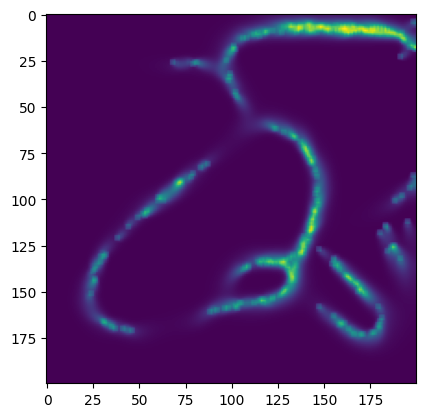

In [29]:
plt.imshow(trailmap.T + foodmap.T)